In [ ]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from torchvision.datasets import MNIST
import sys
import numpy as np
sys.path.append('..')
sys.path.append('../stylegan3')

from stylegan_generator import StyleGANGenerator

In [2]:
print(sys.path)

['/home/robert/diploma-thesis/DP/notebooks', '/home/robert/miniconda3/envs/DP/lib/python310.zip', '/home/robert/miniconda3/envs/DP/lib/python3.10', '/home/robert/miniconda3/envs/DP/lib/python3.10/lib-dynload', '', '/home/robert/miniconda3/envs/DP/lib/python3.10/site-packages', '..', '../stylegan3']


## First we test the model on MNIST dataset

In [2]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataset = MNIST('./mnist_data', transform=img_transform, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



In [2]:
class LAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(512,1024),
            nn.ReLU(),
            nn.Linear(1024, 2048),
            nn.ReLU(), 
            nn.Linear(2048, 2048), 
            nn.ReLU(), 
            nn.Linear(2048, 2048))
        self.decoder = nn.Sequential(
            nn.Linear(2048, 2048),
            nn.ReLU(),
            nn.Linear(2048, 2048),
            nn.ReLU(),
            nn.Linear(2048, 1024),
            nn.ReLU(), 
            nn.Linear(1024, 512),
            nn.Tanh() )            
        
    def forward(self, x):
        latent = self.encoder(x)
        x = self.decoder(latent)
        return x,latent

In [ ]:
num_epochs = 10
batch_size = 128
learning_rate = 1e-5
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

model = LAutoencoder()
model.cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for data in dataloader:
        img, labels = data
        img = img.view(img.size(0), -1).cuda()  
               
        output,latent = model(img)
        loss = criterion(output, img)
       
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.data.item()}')

## Lets try ours latents dataset :)

In [3]:
data_path = '/home/robert/data/diploma-thesis/datasets/stylegan3/tpsi_1/latents/sample_z.h5'
labels_path = '/home/robert/data/diploma-thesis/predictions/stylegan3/tpsi_1/resnet34_eyeglasses.pkl'

In [4]:
import pickle, h5py

labels = None
with open(labels_path,'rb') as f:
    labels = torch.Tensor(pickle.load(f))

data = None
with h5py.File(data_path, 'r') as f:
    data = torch.Tensor(f['z'][:])

dataset = TensorDataset(data,labels)

In [7]:
num_epochs = 500
batch_size = 128
learning_rate = 1e-5
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

model = LAutoencoder()
model.cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for data in dataloader:
        img, labels = data
        img = img.view(img.size(0), -1).cuda()  
               
        output,latent = model(img)
        loss = criterion(output, img)
       
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.data.item()}')

epoch [1/500], loss:0.8391863703727722
epoch [2/500], loss:0.7664892673492432
epoch [3/500], loss:0.7123199701309204
epoch [4/500], loss:0.6790396571159363
epoch [5/500], loss:0.652807354927063
epoch [6/500], loss:0.6272757053375244
epoch [7/500], loss:0.6055119633674622
epoch [8/500], loss:0.5932503938674927
epoch [9/500], loss:0.5726494193077087
epoch [10/500], loss:0.5610451698303223
epoch [11/500], loss:0.5548039674758911
epoch [12/500], loss:0.5360841155052185
epoch [13/500], loss:0.5266757607460022
epoch [14/500], loss:0.5192658305168152
epoch [15/500], loss:0.5085545182228088
epoch [16/500], loss:0.5000406503677368
epoch [17/500], loss:0.4934979975223541
epoch [18/500], loss:0.4828000068664551
epoch [19/500], loss:0.4743584096431732
epoch [20/500], loss:0.46354788541793823
epoch [21/500], loss:0.46141260862350464
epoch [22/500], loss:0.4653710722923279
epoch [23/500], loss:0.453640878200531
epoch [24/500], loss:0.44223707914352417
epoch [25/500], loss:0.43981003761291504
epoch [

epoch [202/500], loss:0.19060774147510529
epoch [203/500], loss:0.19273146986961365
epoch [204/500], loss:0.19012603163719177
epoch [205/500], loss:0.18967556953430176
epoch [206/500], loss:0.18740227818489075
epoch [207/500], loss:0.18627777695655823
epoch [208/500], loss:0.18965387344360352
epoch [209/500], loss:0.18710744380950928
epoch [210/500], loss:0.18344897031784058
epoch [211/500], loss:0.18899480998516083
epoch [212/500], loss:0.1832176148891449
epoch [213/500], loss:0.1874566376209259
epoch [214/500], loss:0.1831766664981842
epoch [215/500], loss:0.18508651852607727
epoch [216/500], loss:0.18301664292812347
epoch [217/500], loss:0.18191885948181152
epoch [218/500], loss:0.18484440445899963
epoch [219/500], loss:0.18599697947502136
epoch [220/500], loss:0.18226048350334167
epoch [221/500], loss:0.1819208860397339
epoch [222/500], loss:0.18120786547660828
epoch [223/500], loss:0.18155425786972046
epoch [224/500], loss:0.1816263049840927
epoch [225/500], loss:0.175749853253364

epoch [399/500], loss:0.1623842716217041
epoch [400/500], loss:0.16332116723060608
epoch [401/500], loss:0.16419939696788788
epoch [402/500], loss:0.16057269275188446
epoch [403/500], loss:0.16358870267868042
epoch [404/500], loss:0.16305097937583923
epoch [405/500], loss:0.1599549949169159
epoch [406/500], loss:0.15932416915893555
epoch [407/500], loss:0.16312792897224426
epoch [408/500], loss:0.16455723345279694
epoch [409/500], loss:0.1638881266117096
epoch [410/500], loss:0.1615493893623352
epoch [411/500], loss:0.16471745073795319
epoch [412/500], loss:0.16083741188049316
epoch [413/500], loss:0.163021981716156
epoch [414/500], loss:0.1664697825908661
epoch [415/500], loss:0.16337540745735168
epoch [416/500], loss:0.16088181734085083
epoch [417/500], loss:0.1665022224187851
epoch [418/500], loss:0.16033689677715302
epoch [419/500], loss:0.16597029566764832
epoch [420/500], loss:0.16310352087020874
epoch [421/500], loss:0.1646805703639984
epoch [422/500], loss:0.16341258585453033
e

In [14]:
test = np.random.randn(1,512)
pred = None
model.eval()
with torch.no_grad():
    pred = model(torch.Tensor(test).to('cuda'))

In [26]:
pred = pred[0].cpu().numpy()

In [27]:
np.mean(pred - test)

-0.005673344826865517

In [32]:
from stylegan_generator import StyleGANGenerator
network_pkl = 'https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhqu-1024x1024.pkl'
generator = StyleGANGenerator(network_pkl)

In [28]:
generator.generate_from('test_vs.png', test.reshape(-1,512))
generator.generate_from('pred_vs.png', pred.reshape(-1,512))

Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.


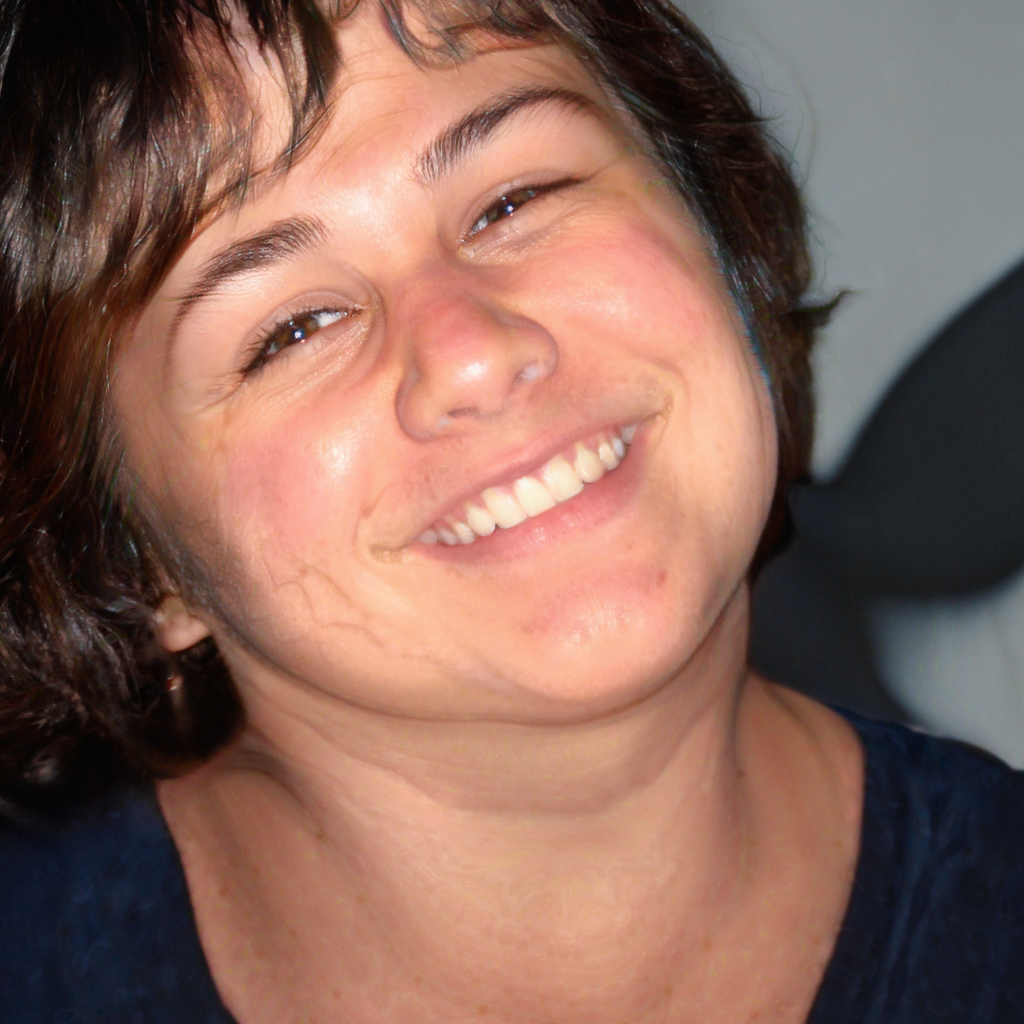

In [29]:
from IPython.display import Image
Image(filename='test_vs.png')

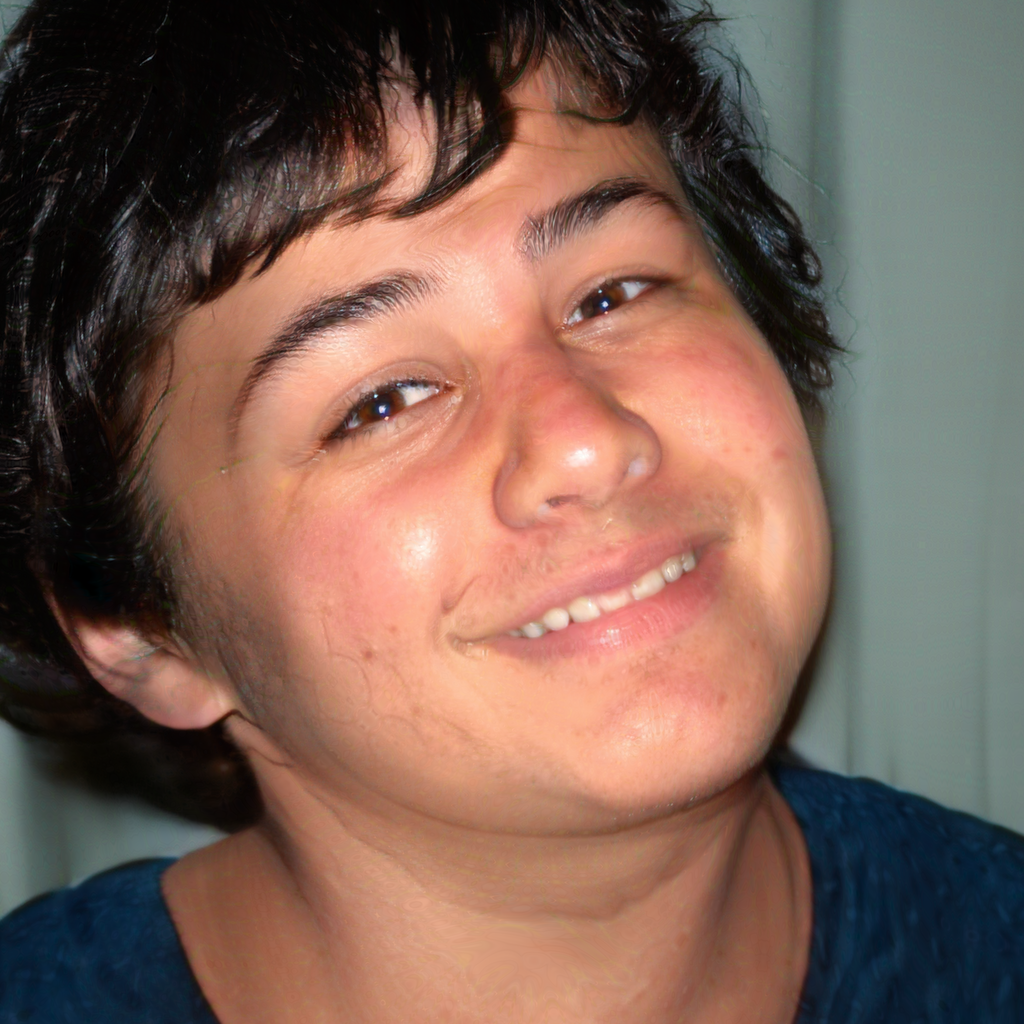

In [30]:
Image(filename='pred_vs.png')